In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [78]:
def pca_recover(X,Y):
    data = np.vstack((X,Y)).T
    pca = PCA(n_components=2)
    principalComponents = pca.fit(data).components_    
    first_PC = principalComponents[0]
    return first_PC[1]/first_PC[0] 
def ls_recover(X,Y):
    X_bar = np.mean(X)
    Y_bar = np.mean(Y)
    return (X - X_bar) @ (Y - Y_bar) / np.linalg.norm(X-X_bar)**2 

In [79]:
X = np.arange(0.001,1,.001)
Y = 2*X
print(pca_recover(X,Y))
print(ls_recover(X,Y))

2.0
2.0


## part b

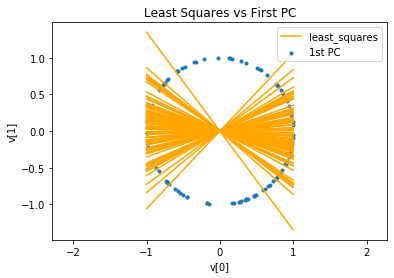

In [70]:
x,y = [],[]

for i in range(100):
    X = np.random.rand(10)
    Y = np.random.rand(10)
    v = pca_recover(X,Y)
    plt.plot([-1,1],np.array([-1,1])*ls_recover(X,Y),color='orange')
    x.append(v[0])
    y.append(v[1])
plt.plot([],[],color='orange',label='least_squares')
plt.scatter(x,y,marker='.',label='1st PC')
plt.legend()
plt.gca().axis('equal')
plt.title("Least Squares vs First PC")
plt.xlabel("v[0]")
plt.ylabel("v[1]")
plt.savefig('1b.png')
plt.show()

## part c

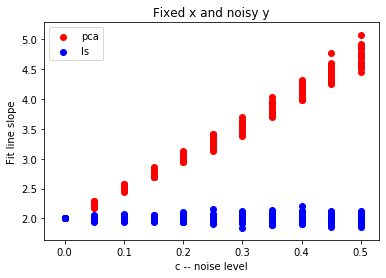

In [86]:
X = np.linspace(0.001,1,1000)
cs = np.arange(0,0.55,0.05)
num_iter = 30
for c in cs:
    pca = []
    ls = []
    for iter in range(num_iter):
        Y = 2*X + np.random.randn(1000)*np.sqrt(c)
        pca.append(pca_recover(X,Y))
        ls.append(ls_recover(X,Y))
    plt.scatter([c]*num_iter, pca,color='r')
    plt.scatter([c]*num_iter, ls,color='b')
plt.scatter([], [],color='r',label='pca')
plt.scatter([], [],color='b',label='ls')
plt.legend()
plt.title('Fixed x and noisy y')
plt.xlabel('c -- noise level')
plt.ylabel('Fit line slope')
plt.savefig('1c.png')
plt.show()    

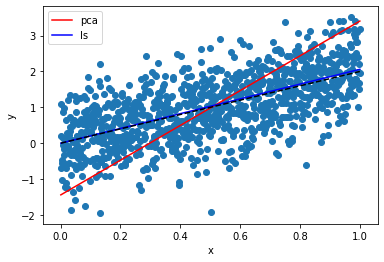

In [116]:
c = 0.5
X = np.linspace(0.001,1,1000)
Y = 2*X + np.random.randn(1000)*np.sqrt(c)
plt.scatter(X,Y)
mu_x = np.mean(X) 
mu_y = np.mean(Y) 
plt.plot(X,pca_recover(X,Y)*(X-mu_x) + mu_y,label='pca',color='r')
plt.plot(X,ls_recover(X,Y)*X,label='ls',color='b')
plt.plot(X,2*X,color='k',linestyle='--')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.savefig('1c_iter.png')
plt.show()

## part d

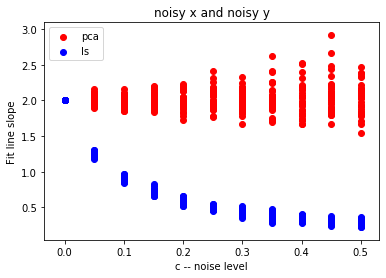

In [87]:
cs = np.arange(0,0.55,0.05)
num_iter = 30
for c in cs:
    pca = []
    ls = []
    for iter in range(num_iter):
        x = np.linspace(0.001,1,1000)
        X = x + np.random.randn(1000)*np.sqrt(c)
        Y = 2*x + np.random.randn(1000)*np.sqrt(c)
        pca.append(pca_recover(X,Y))
        ls.append(ls_recover(X,Y))
    plt.scatter([c]*num_iter, pca,color='r')
    plt.scatter([c]*num_iter, ls,color='b')
plt.scatter([], [],color='r',label='pca')
plt.scatter([], [],color='b',label='ls')
plt.legend()
plt.title('noisy x and noisy y')
plt.xlabel('c -- noise level')
plt.ylabel('Fit line slope')
plt.savefig('1d.png')
plt.show()    

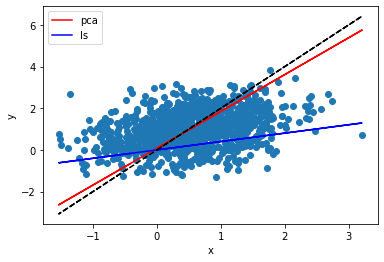

In [118]:
c = 0.5
x = np.linspace(0.001,1,1000)
X = x + np.random.randn(1000)*np.sqrt(c)
Y = 2*x + np.random.randn(1000)*np.sqrt(c)
plt.scatter(X,Y)
mu_x = np.mean(X) 
mu_y = np.mean(Y) 
plt.plot(X,pca_recover(X,Y)*(X-mu_x) + mu_y,label='pca',color='r')
plt.plot(X,ls_recover(X,Y)*X,label='ls',color='b')
plt.plot(X,2*X,color='k',linestyle='--')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.savefig('1d_iter.png')
plt.show()  

## part 2

In [120]:
genomes = np.loadtxt('p4dataset2020.txt',dtype='str')

In [121]:
genomes.shape

(995, 10104)

In [122]:
genomes

array([['HG01879', '1', 'ACB', ..., 'T', 'G', 'A'],
       ['HG01880', '2', 'ACB', ..., 'T', 'G', 'G'],
       ['HG01881', '2', 'ACB', ..., 'T', 'G', 'G'],
       ...,
       ['NA20364', '2', 'ASW', ..., 'T', 'G', 'G'],
       ['NA20412', '2', 'ASW', ..., 'T', 'G', 'G'],
       ['NA20413', '1', 'ASW', ..., 'T', 'G', 'G']], dtype='<U7')

In [127]:
from scipy import stats
modes = stats.mode(genomes[:,3:])[0]

In [137]:
X = (genomes[:,3:] != modes).astype(float)

## part b

In [147]:
pca = PCA(n_components=2)
projected = pca.fit_transform(X)

In [169]:
region_codes = np.unique(genomes[:,2]).tolist()
colors = ['C%d'%i for i in range(len(region_codes))]

In [187]:
regions = ['Afro-Carib,Barbados', 'A-A, SW USA', 'Esan,Nigeria','Gambian','Luhya,Kenya','Mende,Sierra Leone', 'Yoruba,Nigeria' ]

In [188]:
for a,b in zip(regions,region_codes):
    print("%s : %s" %(b,a))

ACB : Afro-Carib,Barbados
ASW : A-A, SW USA
ESN : Esan,Nigeria
GWD : Gambian
LWK : Luhya,Kenya
MSL : Mende,Sierra Leone
YRI : Yoruba,Nigeria


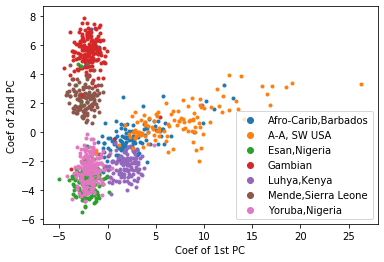

In [189]:
for i in range(projected.shape[0]):
    ind = region_codes.index(region)
    region = genomes[i,2]    
    color = colors[ind]
    plt.scatter(projected[i,0],projected[i,1],color=color,marker='.')
for region in region_codes:    
    ind = region_codes.index(region)
    color = colors[ind]
    plt.scatter([],[],color=color,label=regions[ind])
#plt.xlim([-7,50])
plt.legend()
plt.xlabel("Coef of 1st PC")
plt.ylabel("Coef of 2nd PC")
plt.savefig('2b')

## part d

In [190]:
pca = PCA(n_components=3)
projected = pca.fit_transform(X)

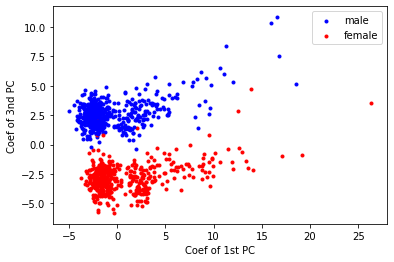

In [199]:
for i in range(projected.shape[0]):
    ind = region_codes.index(region)
    region = genomes[i,2]    
    #color = colors[ind]
    sex = 'male' if genomes[i,1] == '1' else 'female'
    color = 'r' if sex=='female' else 'b'
    marker = '.' #if genomes[i,1] == '1' else '+'
    plt.scatter(projected[i,0],projected[i,2],color=color,marker=marker)
plt.scatter([],[],color='b',marker='.',label='male')
plt.scatter([],[],color='r',marker='.',label='female')
#for region in region_codes:    
#    ind = region_codes.index(region)
#    color = colors[ind]
#    plt.scatter([],[],color=color,label=regions[ind])
#plt.xlim([-7,50])
plt.legend()
plt.xlabel("Coef of 1st PC")
plt.ylabel("Coef of 3nd PC")
plt.savefig('2d')

## part f

(9000, 10101)

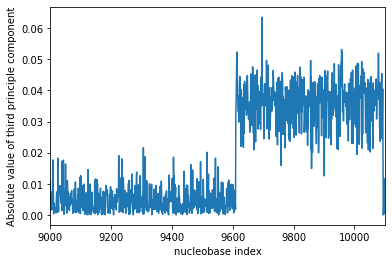

In [205]:
plt.plot(np.abs(pca.components_[2]))
plt.xlabel('nucleobase index')
plt.ylabel('Absolute value of third principle component')
plt.xlim([9000,10101])
#plt.savefig('2f.png')

## Bonus

In [211]:
Y = genomes[:,3:]
Y[Y=='A'] = 1
Y[Y=='C'] = 2
Y[Y=='G'] = 3
Y[Y=='T'] = 4
Y = Y.astype(float)

In [213]:
pca = PCA(n_components=4)
projected = pca.fit_transform(Y)

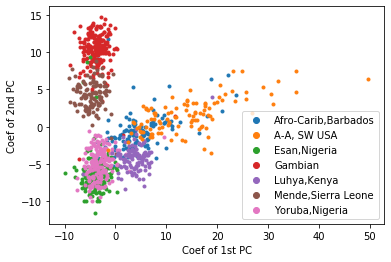

In [217]:
for i in range(projected.shape[0]):
    ind = region_codes.index(region)
    region = genomes[i,2]    
    color = colors[ind]
    plt.scatter(projected[i,0],projected[i,1],color=color,marker='.')
for region in region_codes:    
    ind = region_codes.index(region)
    color = colors[ind]
    plt.scatter([],[],color=color,label=regions[ind])
#plt.xlim([-7,50])
plt.legend()
plt.xlabel("Coef of 1st PC")
plt.ylabel("Coef of 2nd PC")
plt.savefig('2h')

## 2i

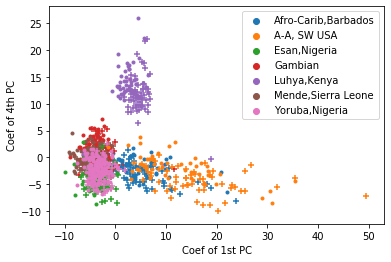

In [219]:
for i in range(projected.shape[0]):
    ind = region_codes.index(region)
    region = genomes[i,2]    
    color = colors[ind]
    sex = 'male' if genomes[i,1] == '1' else 'female'
    marker = '.' if sex=='male' else '+'
    plt.scatter(projected[i,0],projected[i,3],color=color,marker=marker)
for region in region_codes:    
    ind = region_codes.index(region)
    color = colors[ind]
    plt.scatter([],[],color=color,label=regions[ind])
#plt.xlim([-7,50])
plt.legend()
plt.xlabel("Coef of 1st PC")
plt.ylabel("Coef of 4th PC")
plt.savefig('2i')